<a href="https://colab.research.google.com/github/ayush9304/CreditCardDefaultPrediction/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1**   - Ayush Kumar

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

[https://github.com/ayush9304/CreditCardDefaultPrediction](https://github.com/ayush9304/CreditCardDefaultPrediction)

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [247]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from statsmodels.stats.proportion import proportions_ztest

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import classification_report

!pip install shap==0.40.0
import shap 
import graphviz

import pickle

sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [3]:
# Load Dataset
dataset = pd.read_excel("https://github.com/ayush9304/CreditCardDefaultPrediction/blob/main/default%20of%20credit%20card%20clients.xls?raw=true", header=1)

### Dataset First View

In [4]:
# Dataset First Look
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
dataset.shape

(30000, 25)

### Dataset Information

In [6]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
dataset[dataset.duplicated()].shape[0]

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
dataset.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

<Axes: >

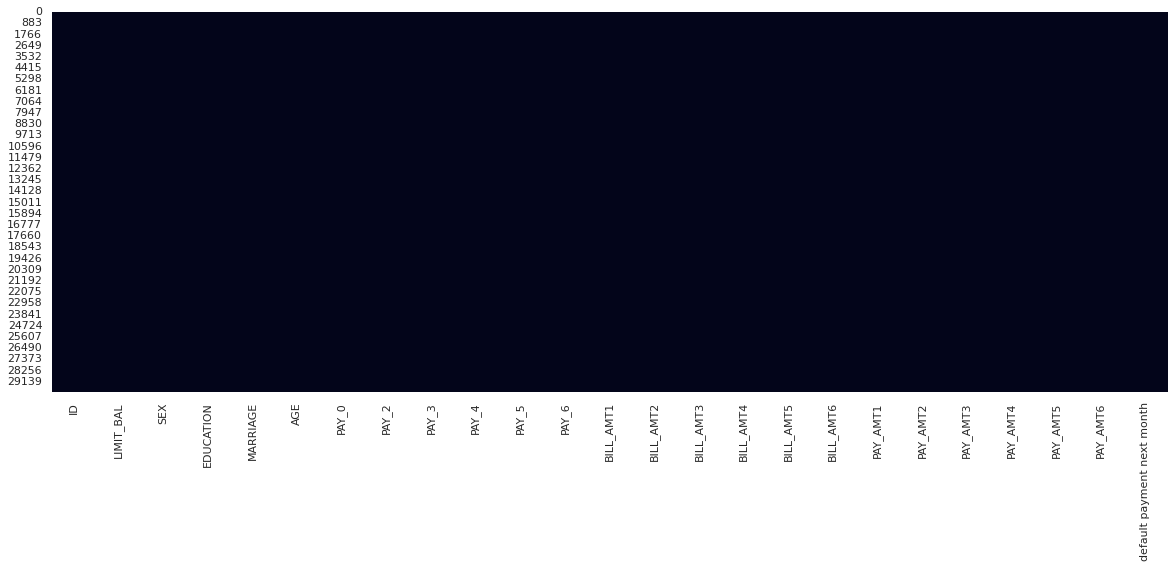

In [9]:
# Visualizing the missing values
plt.figure(figsize=(20,7))
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [11]:
# Dataset Describe
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Variables Description 

* **ID**: ID of each client
* **LIMIT_BAL**: Amount of given credit
* **SEX**: Gender (1=male, 2=female)
* **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
* **AGE**: Age in years
* **PAY_0 - PAY_6**: History of past 6 month payments (-2: Balance paid in full and no transactions made in the month, -1: Payment made on time, 0: The use of revolving credit, 1: Payment delay for one month, 2: Payment delay for two months, 3: Payment delay for three months, ... 8: Payment delay for eight months, 9=payment delay for nine months and above).
* **BILL_AMT1 - BILL_AMT6**: Amount of bill statements for past 6 months.
* **PAY_AMT1 - PAY_AMT6**: Amount of previous payments for past 6 months.
* **default payment next month**: Default payment (1=yes, 0=no)

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique())

No. of unique values in  ID is 30000
No. of unique values in  LIMIT_BAL is 81
No. of unique values in  SEX is 2
No. of unique values in  EDUCATION is 7
No. of unique values in  MARRIAGE is 4
No. of unique values in  AGE is 56
No. of unique values in  PAY_0 is 11
No. of unique values in  PAY_2 is 11
No. of unique values in  PAY_3 is 11
No. of unique values in  PAY_4 is 11
No. of unique values in  PAY_5 is 10
No. of unique values in  PAY_6 is 10
No. of unique values in  BILL_AMT1 is 22723
No. of unique values in  BILL_AMT2 is 22346
No. of unique values in  BILL_AMT3 is 22026
No. of unique values in  BILL_AMT4 is 21548
No. of unique values in  BILL_AMT5 is 21010
No. of unique values in  BILL_AMT6 is 20604
No. of unique values in  PAY_AMT1 is 7943
No. of unique values in  PAY_AMT2 is 7899
No. of unique values in  PAY_AMT3 is 7518
No. of unique values in  PAY_AMT4 is 6937
No. of unique values in  PAY_AMT5 is 6897
No. of unique values in  PAY_AMT6 is 6939
No. of unique values in  default pay

## 3. ***Data Wrangling***

### Data Wrangling Code

I see that in history of past payments columns (PAY_0 to PAY_6), there is no PAY_1 column, on the other hand other columns describing past payments like past payment bills (BILL_AMT1 to BILL_AMT6) and past payment amount (PAY_AMT1 to PAY_AMT6), they are for past 6 months numbered from 1 to 6. So renaming PAY_0 to PAY_1 to make data more sensible.

In [13]:
# Rename PAY_0 to PAY_1
dataset.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [60]:
# Create a copy of the current dataset and assigning to df
df = dataset.copy()

In [61]:
# Rename default payment next month to isDefault for convenience
df.rename(columns={'default payment next month':'DEFAULT'}, inplace=True)

In [62]:
# Columns names
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [63]:
# Unique values of ID feature
df['ID'].unique()

array([    1,     2,     3, ..., 29998, 29999, 30000])

In [64]:
# To study if the client will default or not, ID has nothing to do with it, so dropping it
df.drop(['ID'], axis=1, inplace=True)

In [65]:
# Unique values and their counts of SEX feature
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [66]:
# Unique values and their counts of EDUCATION feature
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [67]:
# Unique values and their counts of MARRIAGE feature
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In marriage column, 0 values are not known and they are very small in number. So will combine these values in others category

In [68]:
df['MARRIAGE'] = df['MARRIAGE'].replace({0: "Others"})

In [69]:
# Unique values and their counts of DEFAULT feature
df['DEFAULT'].value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

In [70]:
# Replacing numerical values of categorical variables to appropriate labels for better visualizations
# In feature engineering I'll apply categorical encoding to these features
df.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
df.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 0 : 'Others', 4: 'Others', 5: 'Others', 6: 'Others'}}, inplace=True)
df.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)
# df.replace({'DEFAULT' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

df.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,Female,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,Female,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,Female,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [71]:
# Description of Age
df['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [26]:
# # Will use age bins to visualize rates for default by age sections
# df["AGE BIN"] = pd.cut(df['AGE'], bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])

In [72]:
# Creating new feature avg_credit_utilization_ratio
total_outstanding_balance = df.loc[:, 'BILL_AMT1':'BILL_AMT6'].sum(axis=1)
total_credit_limit = df['LIMIT_BAL'] * 6
df['avg_credit_utilization_ratio'] = total_outstanding_balance / total_credit_limit
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,avg_credit_utilization_ratio
0,20000,Female,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.064200
1,120000,Female,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.023718
2,90000,Female,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.188246
3,50000,Female,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.771113
4,50000,Male,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.364463


In [73]:
# Creating new feature late_payment_count
# Create a list of payment status columns
payment_status_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Calculate the number of late payments for each user
df['late_payment_count'] = df[payment_status_cols].apply(lambda x: (x > 0).sum(), axis=1)

In [153]:
#function to get numerical and categorical columns
def get_grouped_column(df):
  numerical_columns=[]
  for col in df.columns:
    if df[col].nunique()>15:
      numerical_columns.append(col)
  categorical_columns=list(set(df.columns)-set(numerical_columns))

  return categorical_columns ,numerical_columns

In [154]:
categorical_columns, numerical_columns = get_grouped_column(df)
print("Categorical:",categorical_columns)
print("Numerical:",numerical_columns)

Categorical: ['EDUCATION', 'PAY_3', 'PAY_4', 'SEX', 'DEFAULT', 'PAY_5', 'PAY_6', 'PAY_2', 'MARRIAGE', 'late_payment_count', 'PAY_1']
Numerical: ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'avg_credit_utilization_ratio']


In [129]:
# for col in numerical_columns:
#   print(f"{col}:\tMIN: {df[col].min()}\tMAX: {df[col].max()}")

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Bar chart & Pie Chart on Default

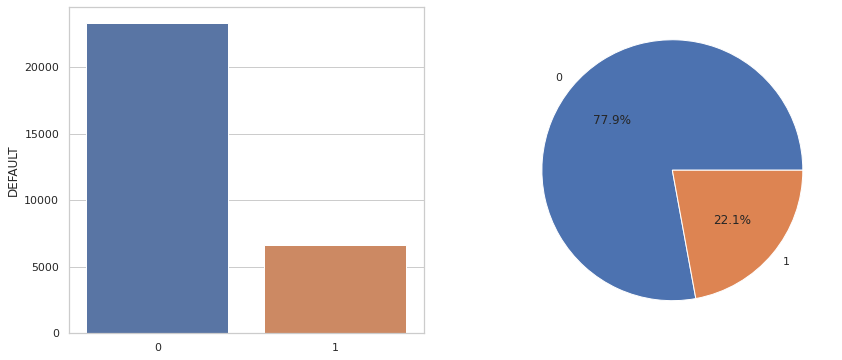

In [30]:
d = df['DEFAULT'].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(x=d.index, y=d)

plt.subplot(1,2,2)
p = plt.pie(d, labels=d.index, autopct="%.1f%%")

##### 1. Why did you pick the specific chart?

To check proportions of Defaulters among all the clients.

##### 2. What is/are the insight(s) found from the chart?

Around 22% clients gets defaulted. Also it is an imbalanced dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2 - Bar chart & Pie chart of Default by sex

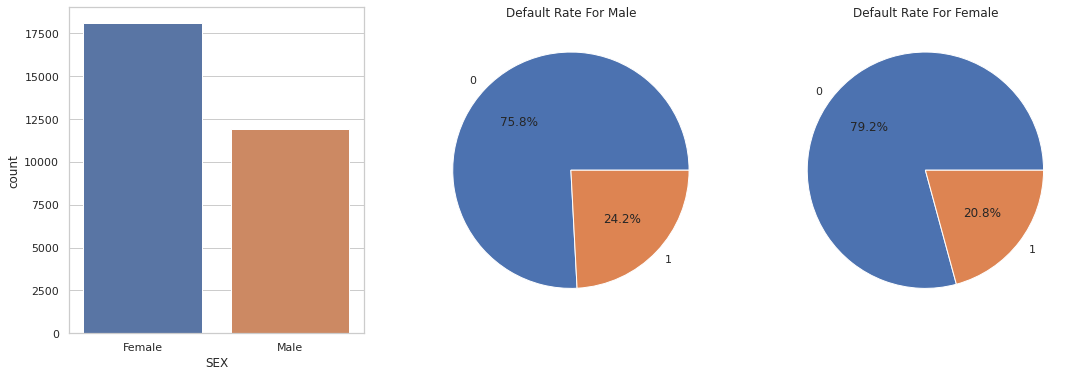

In [31]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.countplot(x='SEX', data=df)

d = df.groupby(['SEX', 'DEFAULT'])['DEFAULT'].count()

plt.subplot(1,3,2)
plt.title("Default Rate For Male")
p = plt.pie(d.Male, labels=d.Male.index, autopct="%.1f%%")

plt.subplot(1,3,3)
plt.title("Default Rate For Female")
p = plt.pie(d.Female, labels=d.Female.index, autopct="%.1f%%")

In [32]:
df.groupby(['SEX', 'DEFAULT'])['DEFAULT'].count().Male

DEFAULT
0    9015
1    2873
Name: DEFAULT, dtype: int64

##### 1. Why did you pick the specific chart?

Bar chart: To campare number of males and females.

Pie Chart: To get proportion of defaults for each sex.

##### 2. What is/are the insight(s) found from the chart?

There are more women than men in our dataset and apparently, men have a slightly higher rate of default compared to female.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3 - Bar chart & Pie chart for default by education

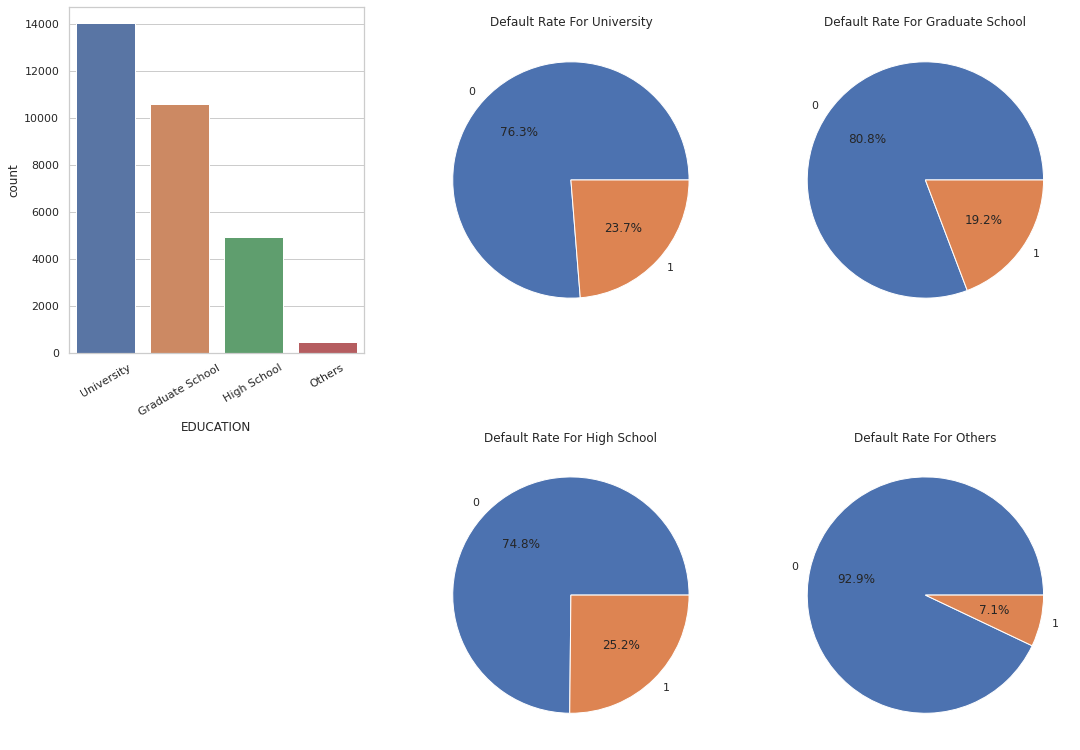

In [33]:
plt.figure(figsize=(18,14))
plt.subplot(2,3,1)
sns.countplot(x='EDUCATION', data=df)
p = plt.xticks(rotation=30)

d = df.groupby(['EDUCATION', 'DEFAULT'])['DEFAULT'].count()

plt.subplot(2,3,2)
plt.title("Default Rate For University")
p = plt.pie(d.University, labels=d.University.index, autopct="%.1f%%")

plt.subplot(2,3,3)
plt.title("Default Rate For Graduate School")
p = plt.pie(d['Graduate School'], labels=d['Graduate School'].index, autopct="%.1f%%")

plt.subplot(2,3,5)
plt.title("Default Rate For High School")
p = plt.pie(d['High School'], labels=d['High School'].index, autopct="%.1f%%")

plt.subplot(2,3,6)
plt.title("Default Rate For Others")
p = plt.pie(d.Others, labels=d.Others.index, autopct="%.1f%%")

##### 1. Why did you pick the specific chart?

Bar chart: To campare number of clients by Education.

Pie Chart: To get proportion of defaults for clients by each education.

##### 2. What is/are the insight(s) found from the chart?

Default rate for High School educated clients is highest and Others category clients has lowest rate of defaults.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 - Bar chart & Pie chart for default by Marriage

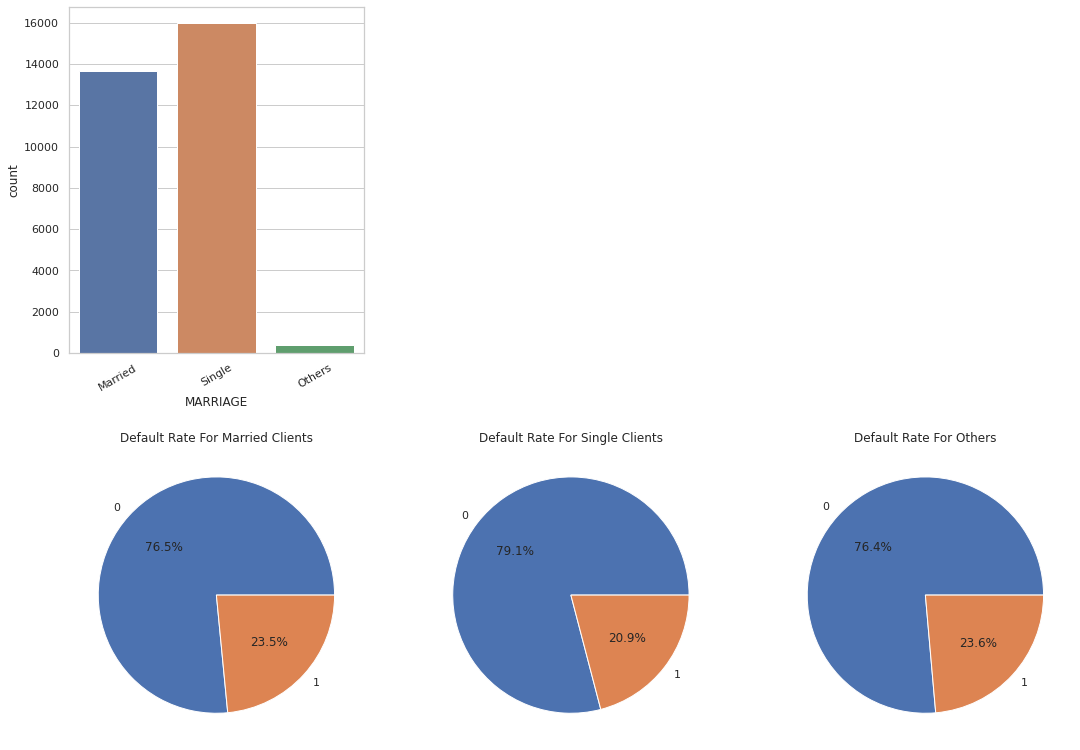

In [34]:
plt.figure(figsize=(18,14))
plt.subplot(2,3,1)
sns.countplot(x='MARRIAGE', data=df)
p = plt.xticks(rotation=30)

d = df.groupby(['MARRIAGE', 'DEFAULT'])['DEFAULT'].count()

plt.subplot(2,3,4)
plt.title("Default Rate For Married Clients")
p = plt.pie(d['Married'], labels=d['Married'].index, autopct="%.1f%%")

plt.subplot(2,3,5)
plt.title("Default Rate For Single Clients")
p = plt.pie(d['Single'], labels=d['Single'].index, autopct="%.1f%%")

plt.subplot(2,3,6)
plt.title("Default Rate For Others")
p = plt.pie(d.Others, labels=d.Others.index, autopct="%.1f%%")

##### 1. Why did you pick the specific chart?

Bar chart: To campare number of clients by Marriage.

Pie Chart: To get proportion of defaults for clients by each marriage.

##### 2. What is/are the insight(s) found from the chart?

Most people fall under Married and Single category with singles being highest.

The default rate in all the categories is almost same with in Others and Married clients.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

<Axes: xlabel='AGE', ylabel='Count'>

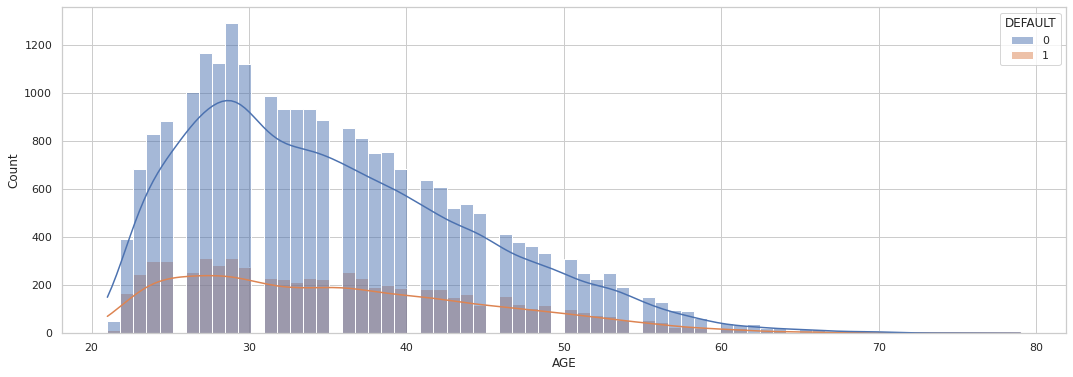

In [35]:
plt.figure(figsize=(18,6))
sns.histplot(x='AGE', data=df, hue='DEFAULT',kde=True)

##### 1. Why did you pick the specific chart?

To compare numbers of clients by age.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6 - Bar Plot for default rate by age group

Text(0, 0.5, 'Default Rate')

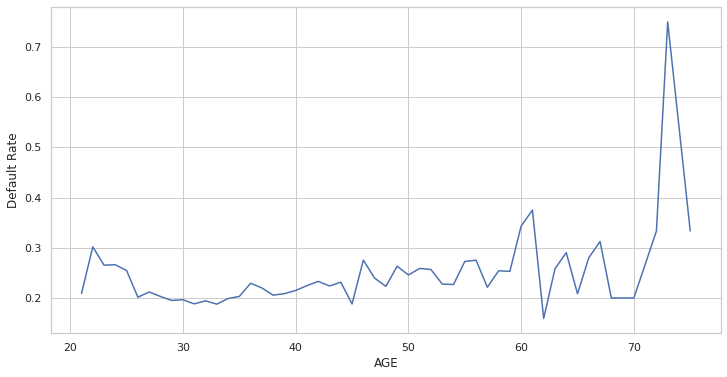

In [36]:
plt.figure(figsize=(12,6))
df.groupby('AGE')['DEFAULT'].value_counts(normalize = True)[:, 1].plot()
plt.ylabel("Default Rate")

##### 1. Why did you pick the specific chart?

To visualize how default rate varies by age.

##### 2. What is/are the insight(s) found from the chart?

The lowest default rate are in middle aged clients, while the highest default rates occur with young clients and old clients.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7 - Distribution of LIMIT_BAL

<Axes: xlabel='LIMIT_BAL', ylabel='Count'>

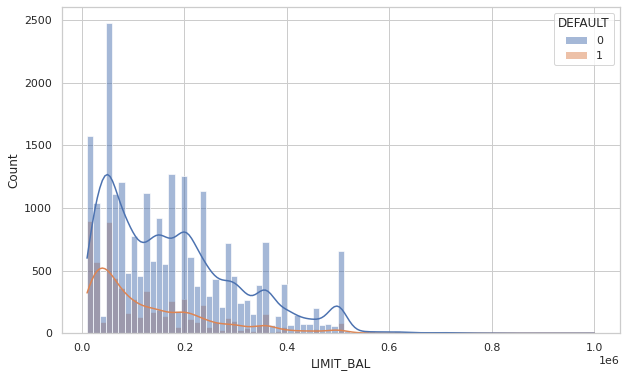

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(x='LIMIT_BAL', hue='DEFAULT', data=df, kde=True)

##### 1. Why did you pick the specific chart?

Histogram to visualize distribution of LIMIT_BAL.

##### 2. What is/are the insight(s) found from the chart?

As expected, the distribution is right skewed and most customers have 200k or less of credit limit and more customers going default on that range.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8 - Histogram of avg_credit_utilization_rate

<Axes: xlabel='avg_credit_utilization_ratio', ylabel='Count'>

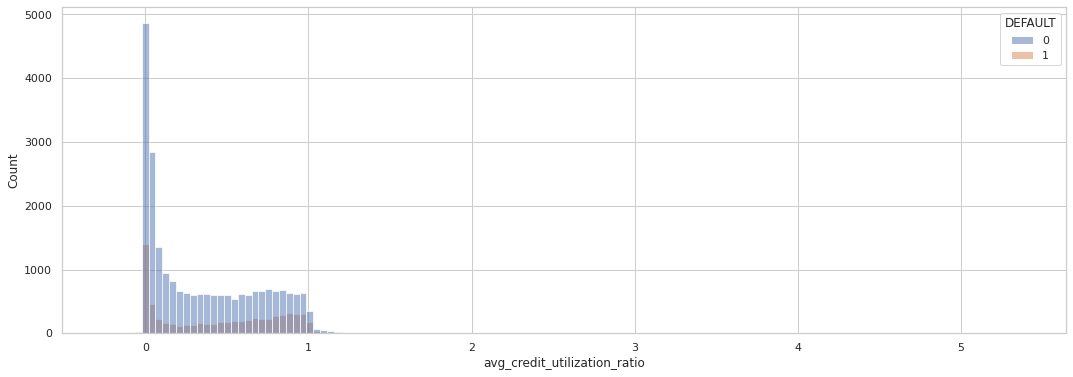

In [39]:
plt.figure(figsize=(18,6))
sns.histplot(x='avg_credit_utilization_ratio', data=df, hue='DEFAULT')

##### 1. Why did you pick the specific chart?

To visualize distribution of average credit utilization ratio

##### 2. What is/are the insight(s) found from the chart?

As the credit utilization rate increases, the rate of defaults also increases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9 - Bar chart default rate for different bill amount groups

In [38]:
def get_bill_amt_bins(df):
  df2 = df.copy()

  bill_amtx = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
  bill_amtx_bins = ['BILL_AMT1_BIN', 'BILL_AMT2_BIN', 'BILL_AMT3_BIN', 'BILL_AMT4_BIN', 'BILL_AMT5_BIN', 'BILL_AMT6_BIN']

  for i, col in enumerate (bill_amtx_bins):
      df2[col] = pd.cut(df2[bill_amtx[i]],[-350000, -1, 0, 25000, 75000, 200000, 2000000])
  
  return df2, bill_amtx_bins

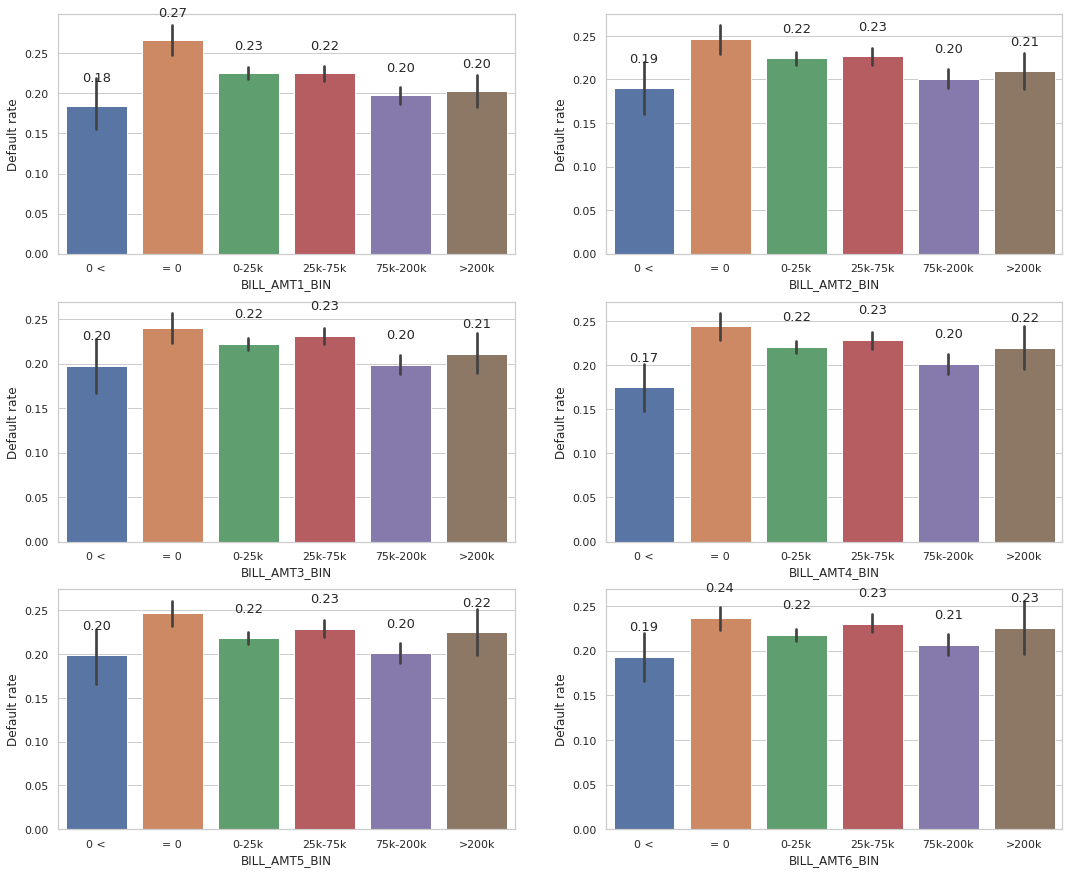

In [39]:
plt.figure(figsize=(18,15))
df2, bins = get_bill_amt_bins(df)
for i,col in enumerate(bins):
    plt.subplot(3, 2, i+1)
    ax = sns.barplot(x = df2[col], y = df2['DEFAULT'])
    plt.ylabel("Default rate")
    plt.xticks([0,1,2,3,4,5],['0 <', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'])
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.21, p.get_height()+0.03),fontsize=13)

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

As expected, those who have a negative bill statement have a lower chance of default than the rest. What stands out is that there is a little higher chance of default for those who didn't have a bill in the previous months.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10 - Bar plot default rate by late payment count

Text(0, 0.5, 'Default Rate')

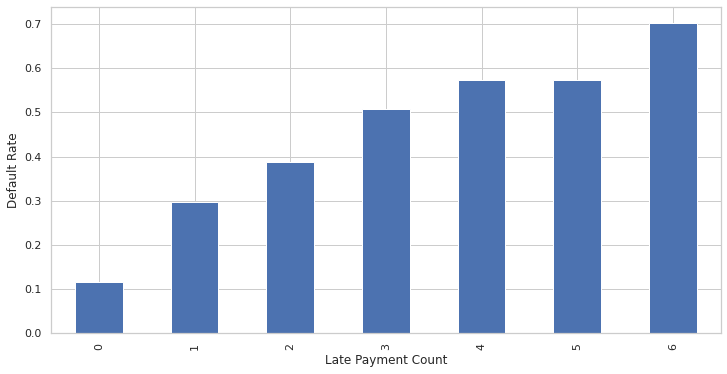

In [40]:
default_rate = df.groupby('late_payment_count')['DEFAULT'].mean()

plt.figure(figsize=(12,6))
default_rate.plot(kind='bar')
plt.xlabel('Late Payment Count')
plt.ylabel('Default Rate')

##### 1. Why did you pick the specific chart?

Bar plot to plot rate of default for different late payment count

##### 2. What is/are the insight(s) found from the chart?

As late payment count increases, chances of default increases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [41]:
def get_pay_amt_bins(df):
  df2 = df.copy()

  pay_amtx = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
  pay_amtx_bins = ['PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin']

  for i, col in enumerate (pay_amtx_bins):
      df2[col] = pd.cut(df[pay_amtx[i]],[-1, 0, 25000, 50000, 100000, 2000000])
  
  return df2, pay_amtx_bins

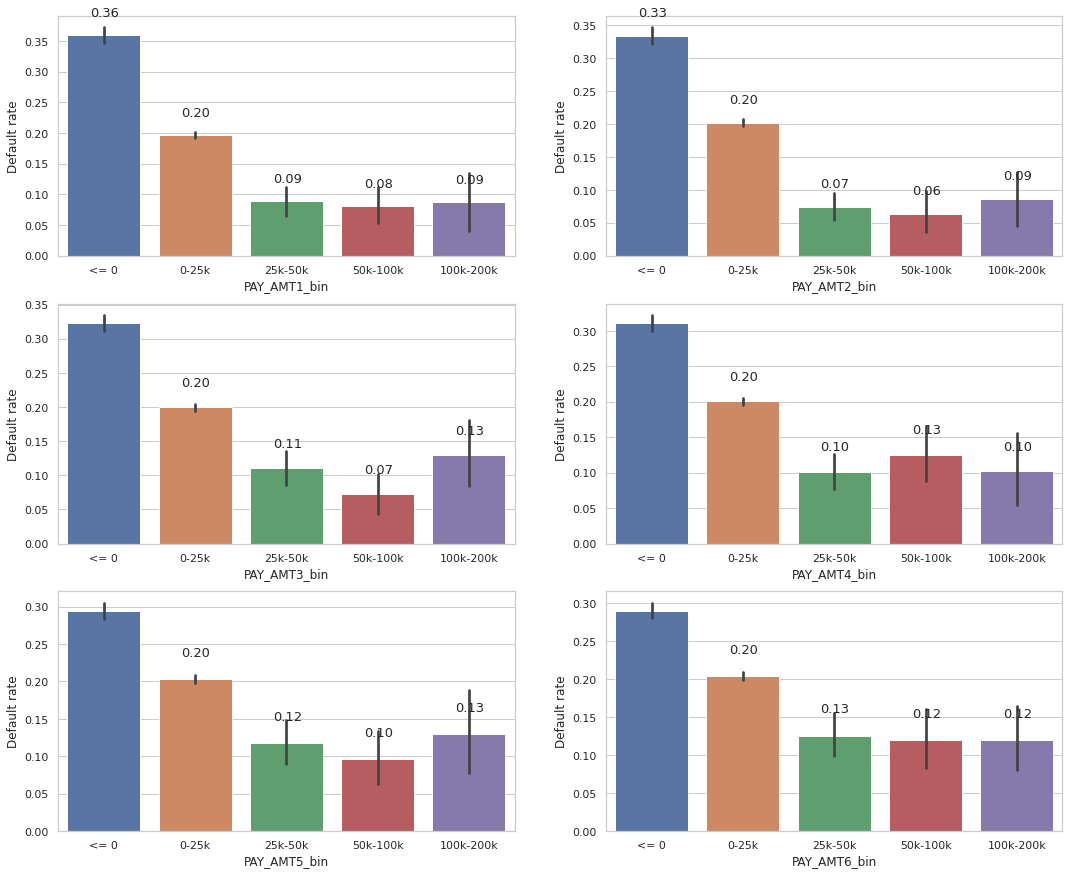

In [42]:
plt.figure(figsize=(18,15))
df2, bins = get_pay_amt_bins(df)
for i,col in enumerate(bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "DEFAULT", data = df2)
    plt.ylabel("Default rate")
    plt.xticks([0,1,2,3,4],['<= 0', '0-25k', '25k-50k', '50k-100k', '100k-200k'])
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Default rate is higher among those who paid nothing in previous months and lower rates among those paid over 25k.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

<Axes: xlabel='LIMIT_BAL', ylabel='MARRIAGE'>

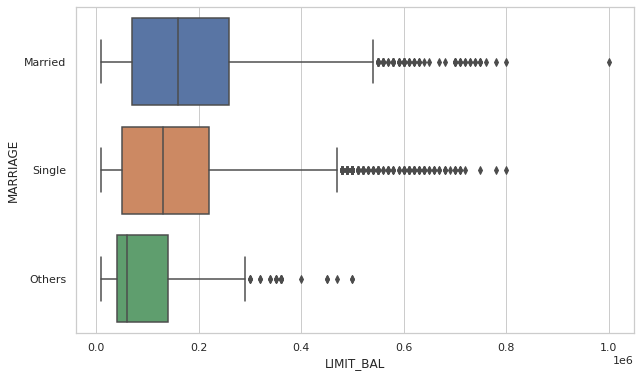

In [43]:
plt.figure(figsize=(10,6))
sns.boxplot(x='LIMIT_BAL', y='MARRIAGE', data=df)

##### 1. Why did you pick the specific chart?

To understand if there are any differences in credit limits across marital statuses.

##### 2. What is/are the insight(s) found from the chart?

The median and upper quartile of **LIMIT_BAL** are higher for married individuals compared to those who are single or have other marital statuses.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

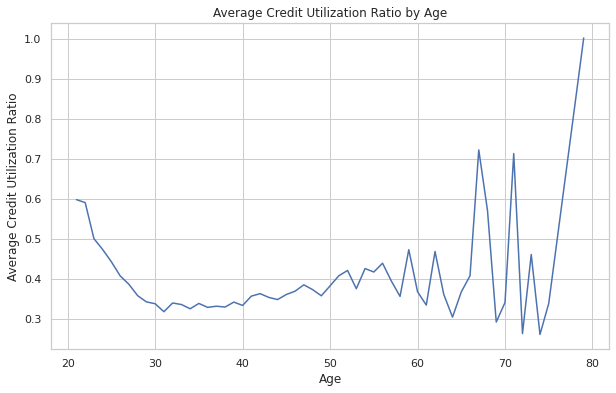

In [44]:
# group data by age and calculate average credit utilization ratio
age_grouped = df.groupby('AGE')['avg_credit_utilization_ratio'].mean()

# plot line chart
plt.figure(figsize=(10,6))
sns.lineplot(x=age_grouped.index, y=age_grouped.values)
plt.title('Average Credit Utilization Ratio by Age')
plt.xlabel('Age')
plt.ylabel('Average Credit Utilization Ratio')
plt.show()


##### 1. Why did you pick the specific chart?

To show the trend of average credit utilization ratio across different ages.

##### 2. What is/are the insight(s) found from the chart?

The average credit utilization ratio is higher among younger individuals (below 25) and older individuals (above 55).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<Axes: >

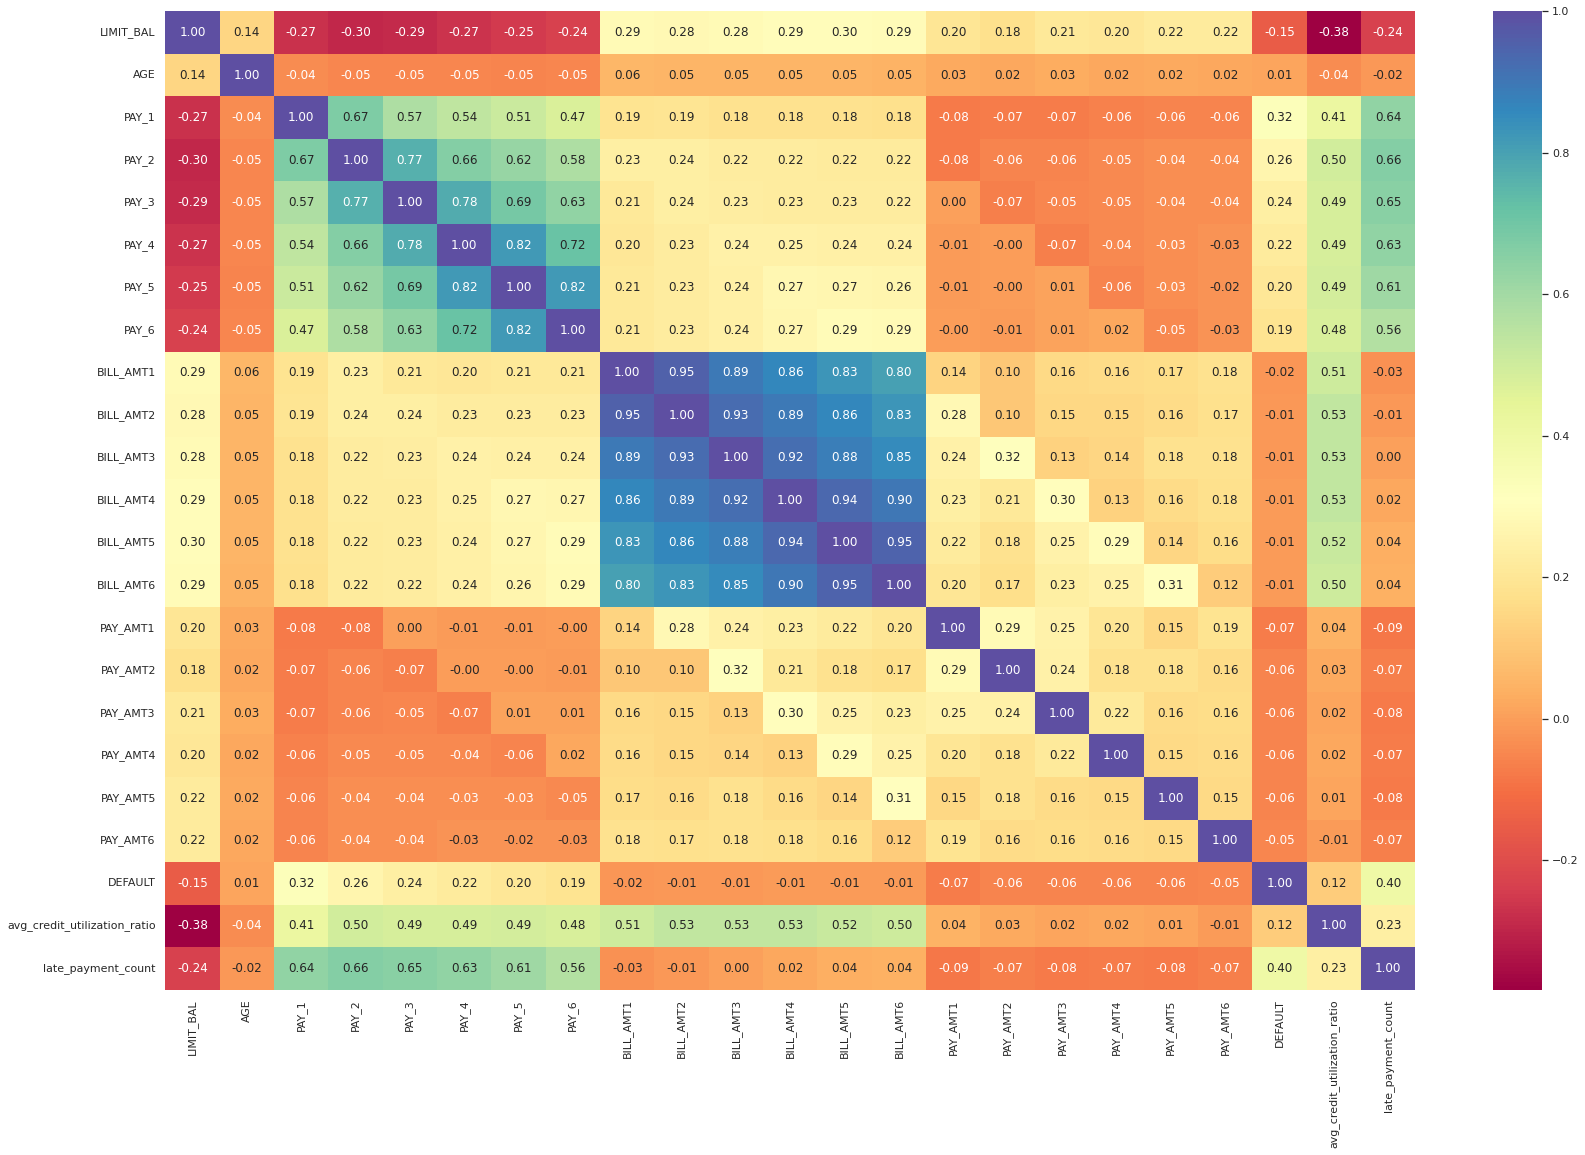

In [45]:
corr = df.corr()
f, ax = plt.subplots(figsize=(28, 18))
sns.heatmap(corr, annot = True, fmt='.2f', cmap="Spectral")

##### 1. Why did you pick the specific chart?

To check the correlation between each features in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - SEX vs LIMIT_BAL

<Axes: xlabel='LIMIT_BAL', ylabel='SEX'>

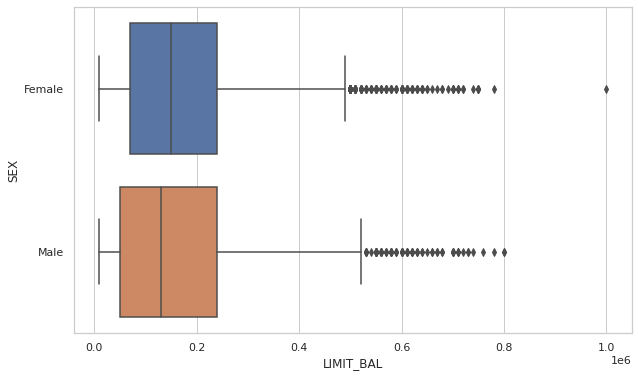

In [46]:
plt.figure(figsize=(10,6))
sns.boxplot(x='LIMIT_BAL', y='SEX', data=df)

##### 1. Why did you pick the specific chart?

To see if there are any gender-based differences in credit limits.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Females are less likely to default on their payments compared to Males.
2. 
3. 

### Hypothetical Statement - 1

Females are less likely to default on their payments compared to Males.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis:** The proportion of defaulters is the same for males and females.

**Alternative Hypothesis:** The proportion of defaulters is lower for females than for males.

**Test Type:** one-tailed two-sample z-test

#### 2. Perform an appropriate statistical test.

In [76]:
# Create two groups based on sex
male_defaults = df[(df['SEX'] == 'Male') & (df['DEFAULT'] == 1)]
female_defaults = df[(df['SEX'] == 'Female') & (df['DEFAULT'] == 1)]

# Calculate the proportions of defaulters in each group
male_proportion = len(male_defaults) / len(df[df['SEX'] == 'Male'])
female_proportion = len(female_defaults) / len(df[df['SEX'] == 'Female'])

# Perform the test for the difference in proportions
z_score, p_value = proportions_ztest([len(female_defaults), len(male_defaults)], 
                                           [len(df[df['SEX'] == 'Female']), len(df[df['SEX'] == 'Male'])], 
                                           alternative='smaller')

# Print the results
print("Male default rate:", round(male_proportion, 4))
print("Female default rate:", round(female_proportion, 4))
print("Z-score:", z_score)
print("P-value:", p_value)
print()
if p_value < 0.05:
  print(f"Since p-value ({p_value}) is less than 0.05, we reject null hypothesis.\nHence, The proportion of defaulters is lower for females than for males.")
else:
  print(f"Since p-value ({p_value}) is greater than 0.05, we fail to reject null hypothesis.\nHence, The proportion of defaulters is the same for males and females.")


Male default rate: 0.2417
Female default rate: 0.2078
Z-score: -6.921375088562895
P-value: 2.236402167907072e-12

Since p-value (2.236402167907072e-12) is less than 0.05, we reject null hypothesis.
Hence, The proportion of defaulters is lower for females than for males.


##### Which statistical test have you done to obtain P-Value?

I have used one-tailed two-sample z-test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and the proportion of defaulters is lower for females than for males.

##### Why did you choose the specific statistical test?

The one-tailed two-sample z-test is used to determine whether the proportion of a certain outcome (in this case, default payment) differs significantly between two groups (in this case, males and females).
The one-tailed aspect of the test indicates that we are only interested in the direction of the difference (whether females have a lower proportion of defaulters than males) and not the magnitude of the difference.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Fit logistic regression model
X = df['avg_credit_utilization_ratio']
y = df['DEFAULT']
X = statsmodels.api.add_constant(X)
model = statsmodels.api.Logit(y, X).fit()

# Print model summary
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.521902
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                DEFAULT   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29998
Method:                           MLE   Df Model:                            1
Date:                Wed, 22 Mar 2023   Pseudo R-squ.:                 0.01234
Time:                        18:56:45   Log-Likelihood:                -15657.
converged:                       True   LL-Null:                       -15853.
Covariance Type:            nonrobust   LLR p-value:                 4.500e-87
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -1.5657      0.022    -72.322      0.000

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [77]:
# Checking missing values
print("Total missing Values:", df.isna().sum().sum())

Total missing Values: 0


#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values to handle in the given dataset.

### 2. Handling Outliers

In [78]:
def draw_histograms(df, columns, bins=50):
    fig=plt.figure(figsize=(18,25))
    for i, col in enumerate(columns):
      plt.subplot(10, 4, i+1)
      sns.histplot(df[col], kde=True, bins=bins)
      plt.title(col)
    fig.tight_layout()

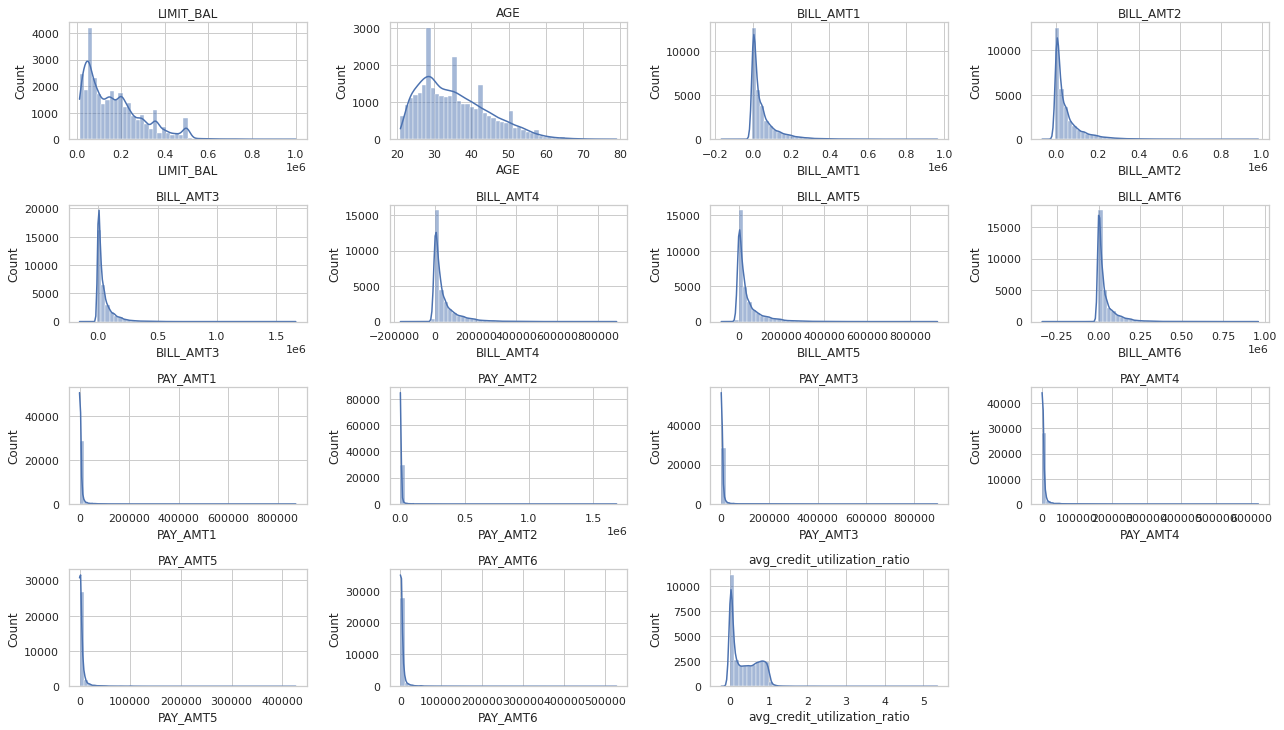

In [141]:
draw_histograms(df, numerical_columns)

We can see that most of the numerical columns are right skewed.

Also *late_payment_count* have 6 values with 0 being majority and we can't treat high values (5 or 6) as outliers as these high values increases chances of defaulting.

In [80]:
#Looking deep into cases with high values for BILL_AMT1 to study if they are genuine observations of data entry errors
df[df['BILL_AMT1'] > 400000][['LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3', 'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'DEFAULT']].head(15)

,LIMIT_BAL,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,DEFAULT
59,400000,0,0,0,400134,398857,404205,17000,15029,30000,0
102,480000,0,0,0,422069,431342,479432,16078,55693,17000,0
360,500000,4,3,2,507726,509229,499936,10000,0,14000,1
407,500000,1,2,0,507062,491956,430637,325,15296,12137,0
451,600000,2,2,0,467150,458862,469703,0,18000,16000,1
918,240000,0,0,0,471814,478380,395612,16044,15087,12000,0
1184,460000,0,0,0,410033,385394,325663,16088,13039,11127,0
1347,630000,0,0,0,440474,444370,455286,18000,20000,12000,0
1358,390000,0,0,0,495559,248821,216051,10218,8035,7035,0
1508,480000,0,0,0,482250,475931,429037,18093,15233,12597,0


They looks like rows with very high values for BILL_AMTX also their LIMIT_BAL is very high. So they must be representing few super rich people and the data are genuine not an error. Hence they are not outliers.

Those who defaulted have significantly lower PAY_AMT compared to BILL_AMT which is expected. 

In [81]:
#Looking deep into cases with high values for PAY_AMT1 to study if they are genuine observations of data entry errors
df[df['PAY_AMT1'] > 300000][['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3','LIMIT_BAL', 'PAY_1', 'PAY_2', 'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'DEFAULT']].head(15)

,PAY_AMT1,PAY_AMT2,PAY_AMT3,LIMIT_BAL,PAY_1,PAY_2,BILL_AMT1,BILL_AMT2,BILL_AMT3,DEFAULT
2687,368199,6486,234,500000,-2,-1,71921,367979,294969,0
5687,302000,66270,15000,480000,0,0,106660,400000,66270,0
8500,405016,0,14000,400000,-1,-1,6500,405016,391178,0
12330,505000,331,1070,300000,1,-1,-165580,324392,296931,0
25431,304815,8000,8127,170000,0,-1,30860,167941,171459,0
28003,493358,1227082,164577,510000,-1,-1,71121,481382,559712,0
28716,873552,1215471,889043,340000,-1,-1,139808,176743,34402,0
29820,423903,15100,14600,400000,1,-1,396343,394858,395716,0
29867,300039,13214,12005,340000,-1,0,44855,331641,331334,0
29963,323014,1605,349395,610000,0,-1,348392,322228,319014,0


Similarly for very high PAY_AMTX values we can see they have very high BILL_AMTX in previous months  and all payments are done duly, So they must be representing super rich people and data is genuine and not errors. Hence they are not outliers.

##### What all outlier treatment techniques have you used and why did you use those techniques?

There are no outliers.

### 3. Categorical Encoding

In [82]:
# Creating a copy of dataframe incase we need it later
df2 = df.copy()

In [83]:
print(categorical_columns)

['EDUCATION', 'SEX', 'MARRIAGE', 'DEFAULT', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


In [155]:
# Checking number of unique values in categorical columns
for col in categorical_columns:
  print("No. of unique values in", col, "is", df2[col].nunique())

No. of unique values in EDUCATION is 4
No. of unique values in PAY_3 is 11
No. of unique values in PAY_4 is 11
No. of unique values in SEX is 2
No. of unique values in DEFAULT is 2
No. of unique values in PAY_5 is 10
No. of unique values in PAY_6 is 10
No. of unique values in PAY_2 is 11
No. of unique values in MARRIAGE is 3
No. of unique values in late_payment_count is 7
No. of unique values in PAY_1 is 11


In [85]:
df2.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,avg_credit_utilization_ratio,late_payment_count
0,20000,Female,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.064200,2
1,120000,Female,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.023718,2
2,90000,Female,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.188246,0
3,50000,Female,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.771113,0
4,50000,Male,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.364463,0


In [86]:
# Converting SEX column into one hot encoding
df2['SEX'] = df2['SEX'].apply(lambda x: 1 if x=='Male' else 0)   # Male:1, Female:0

In [87]:
# Converting EDUCATION & MARRIAGE columns into one hot encoding
d = df2[['EDUCATION', 'MARRIAGE']]
encoded_df = pd.get_dummies(d, drop_first=True)
df2 = pd.concat([df2, encoded_df], axis=1)
df2.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,avg_credit_utilization_ratio,late_payment_count,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,MARRIAGE_Others,MARRIAGE_Single
0,20000,0,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.064200,2,0,0,1,0,0
1,120000,0,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.023718,2,0,0,1,0,1


Leaving *PAY_1*, *PAY_2*, *PAY_3*, *PAY_4*, *PAY_5*, *PAY_6* as it is, since they already in numerical format and they have their natural order of categories.

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

<Axes: >

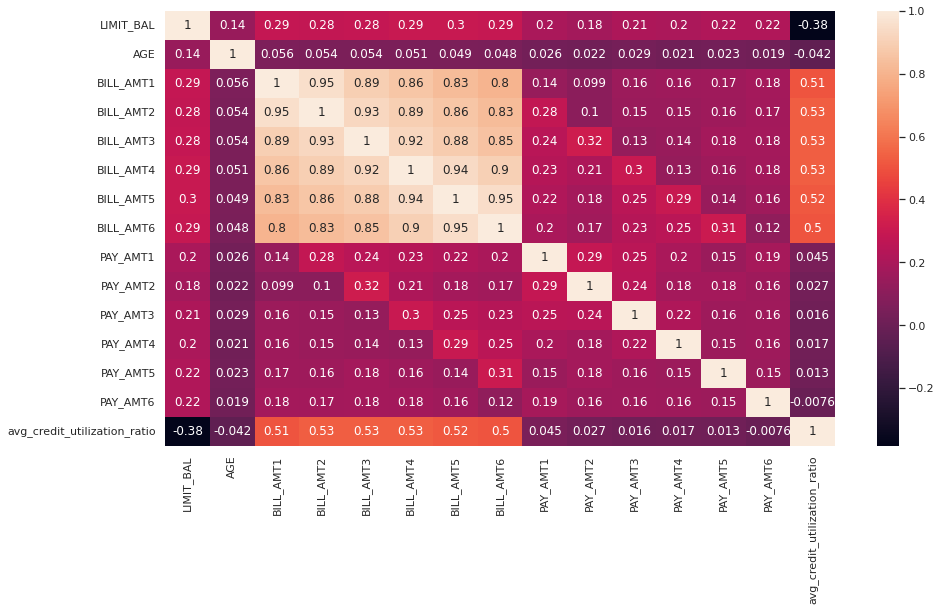

In [156]:
# Plotting correlation heatmap of numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(df2[numerical_columns].corr(), annot=True) 

In [145]:
# new features bill_amt_diff as an indicator of their financial stability or behavior.
df2['bill_amt_diff1'] = df2['BILL_AMT1'] - df2['BILL_AMT2']
df2['bill_amt_diff2'] = df2['BILL_AMT2'] - df2['BILL_AMT3']
df2['bill_amt_diff3'] = df2['BILL_AMT3'] - df2['BILL_AMT4']
df2['bill_amt_diff4'] = df2['BILL_AMT4'] - df2['BILL_AMT5']
df2['bill_amt_diff5'] = df2['BILL_AMT5'] - df2['BILL_AMT6']

In [180]:
# new features avg_bill_amt as an indicator of their level of spending
# two features, one for last 2 months and other for rest 4 months because recent months have more impact on getting default or not
df2['avg_bill_amt1'] = df2[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3']].mean(axis=1)
df2['avg_bill_amt2'] = df2[['BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)

In [ ]:
###############################################

In [175]:
df2['spending_level_max'] = df2[['BILL_AMT1', 'BILL_AMT2']].max(axis=1)
df2['spending_level_min'] = df2[['BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].min(axis=1)

In [182]:
df2['spending_level'] = df2[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)

In [ ]:
###############################################

In [168]:
df2['spending_level1'] = pd.cut(df2['avg_bill_amt1'], bins=[-float('inf'), 0, 5000, 20000, 50000, 100000, 200000, 400000, float('inf')], labels=[0, 1, 2, 3, 4, 5, 6, 7]).astype('uint8')
df2['spending_level2'] = pd.cut(df2['avg_bill_amt2'], bins=[-float('inf'), 0, 5000, 20000, 50000, 100000, 200000, 400000, float('inf')], labels=[0, 1, 2, 3, 4, 5, 6, 7]).astype('uint8')

In [178]:
df2.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,avg_credit_utilization_ratio,late_payment_count,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,MARRIAGE_Others,MARRIAGE_Single,bill_amt_diff1,bill_amt_diff2,bill_amt_diff3,bill_amt_diff4,bill_amt_diff5,avg_bill_amt1,avg_bill_amt2,spending_level1,spending_level2,spending_level_max,spending_level_min
0,20000,0,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.064200,2,0,0,1,0,0,811,2413,689,0,0,3507.5,172.25,1,1,3913,0
1,120000,0,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.023718,2,0,0,1,0,1,957,-957,-590,-183,194,2203.5,3167.50,1,1,2682,2682
2,90000,0,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.188246,0,0,0,1,0,1,15212,468,-772,-617,-601,21633.0,14596.75,3,2,29239,13559
3,50000,0,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.771113,0,0,0,1,0,0,-1243,-1058,20977,-645,-588,47611.5,34027.75,3,3,48233,28314
4,50000,1,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.364463,0,0,0,1,0,0,2947,-30165,14895,1794,15,7143.5,23763.00,2,3,8617,19131


In [183]:
# Getting fresh categorical and numerical columns
cat_columns, num_columns = get_grouped_column(df2)
print("Categorical:", cat_columns)
print("Numerical:", num_columns)

Categorical: ['spending_level2', 'EDUCATION', 'PAY_3', 'PAY_4', 'SEX', 'spending_level1', 'MARRIAGE_Others', 'DEFAULT', 'MARRIAGE_Single', 'EDUCATION_Others', 'EDUCATION_University', 'PAY_5', 'PAY_6', 'PAY_2', 'MARRIAGE', 'EDUCATION_High School', 'late_payment_count', 'PAY_1']
Numerical: ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'avg_credit_utilization_ratio', 'bill_amt_diff1', 'bill_amt_diff2', 'bill_amt_diff3', 'bill_amt_diff4', 'bill_amt_diff5', 'avg_bill_amt1', 'avg_bill_amt2', 'spending_level_max', 'spending_level_min', 'spending_level']


<Axes: >

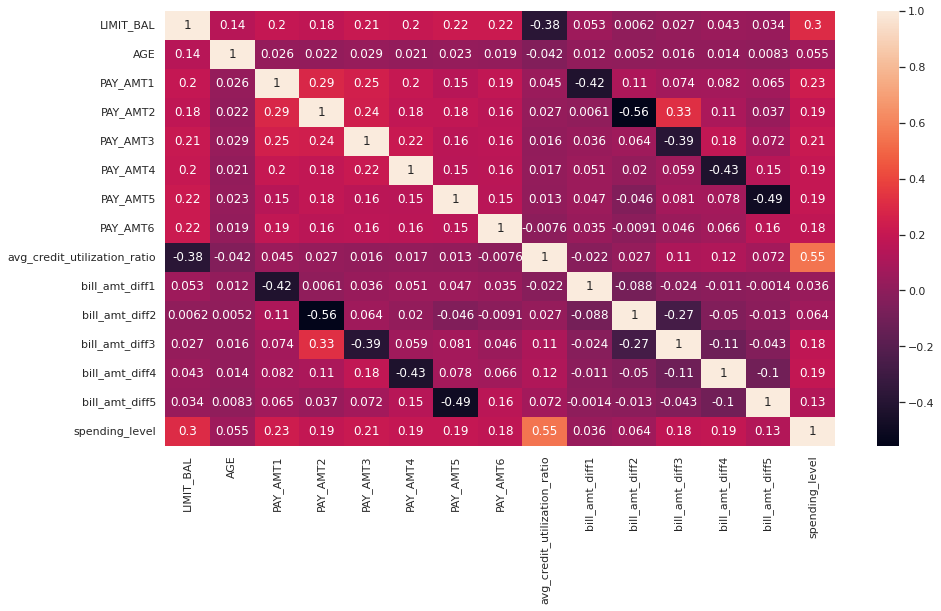

In [184]:
new_num_cols = [col for col in num_columns if col not in ['spending_level_max', 'spending_level_min', 'avg_bill_amt1', 'avg_bill_amt2', 'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
plt.figure(figsize=(15,8))
sns.heatmap(df2[new_num_cols].corr(), annot=True) 

In [93]:
# Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["feature"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif.sort_values(by='VIF', ascending=False)

In [185]:
calc_vif(df2[new_num_cols])

,feature,VIF
1,AGE,5.794396
0,LIMIT_BAL,4.933045
8,avg_credit_utilization_ratio,4.516885
14,spending_level,3.957738
3,PAY_AMT2,2.369799
2,PAY_AMT1,1.889133
4,PAY_AMT3,1.888372
6,PAY_AMT5,1.844658
5,PAY_AMT4,1.784421
10,bill_amt_diff2,1.765186


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

In [186]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LIMIT_BAL                     30000 non-null  int64  
 1   SEX                           30000 non-null  int64  
 2   EDUCATION                     30000 non-null  object 
 3   MARRIAGE                      30000 non-null  object 
 4   AGE                           30000 non-null  int64  
 5   PAY_1                         30000 non-null  int64  
 6   PAY_2                         30000 non-null  int64  
 7   PAY_3                         30000 non-null  int64  
 8   PAY_4                         30000 non-null  int64  
 9   PAY_5                         30000 non-null  int64  
 10  PAY_6                         30000 non-null  int64  
 11  BILL_AMT1                     30000 non-null  int64  
 12  BILL_AMT2                     30000 non-null  int64  
 13  B

In [196]:
final_df1 = df2.copy()
final_df1.drop(['spending_level_min', 'spending_level_max',
                'spending_level1', 'spending_level2',
                'avg_bill_amt1', 'avg_bill_amt2',
                'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'EDUCATION', 'MARRIAGE'],
               axis=1, inplace=True)
final_df1.head()

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,avg_credit_utilization_ratio,late_payment_count,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,MARRIAGE_Others,MARRIAGE_Single,bill_amt_diff1,bill_amt_diff2,bill_amt_diff3,bill_amt_diff4,bill_amt_diff5,spending_level
0,20000,0,24,2,2,-1,-1,-2,-2,0,689,0,0,0,0,1,0.064200,2,0,0,1,0,0,811,2413,689,0,0,1284.000000
1,120000,0,26,-1,2,0,0,0,2,0,1000,1000,1000,0,2000,1,0.023718,2,0,0,1,0,1,957,-957,-590,-183,194,2846.166667
2,90000,0,34,0,0,0,0,0,0,1518,1500,1000,1000,1000,5000,0,0.188246,0,0,0,1,0,1,15212,468,-772,-617,-601,16942.166667
3,50000,0,37,0,0,0,0,0,0,2000,2019,1200,1100,1069,1000,0,0.771113,0,0,0,1,0,0,-1243,-1058,20977,-645,-588,38555.666667
4,50000,1,57,-1,0,-1,0,0,0,2000,36681,10000,9000,689,679,0,0.364463,0,0,0,1,0,0,2947,-30165,14895,1794,15,18223.166667


In [214]:
final_df2 = df2.copy()
final_df2.drop(['spending_level_min', 'spending_level_max',
                'spending_level',
                'avg_bill_amt1', 'avg_bill_amt2',
                'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'EDUCATION', 'MARRIAGE'],
               axis=1, inplace=True)
final_df2.head()

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,avg_credit_utilization_ratio,late_payment_count,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,MARRIAGE_Others,MARRIAGE_Single,bill_amt_diff1,bill_amt_diff2,bill_amt_diff3,bill_amt_diff4,bill_amt_diff5,spending_level1,spending_level2
0,20000,0,24,2,2,-1,-1,-2,-2,0,689,0,0,0,0,1,0.064200,2,0,0,1,0,0,811,2413,689,0,0,1,1
1,120000,0,26,-1,2,0,0,0,2,0,1000,1000,1000,0,2000,1,0.023718,2,0,0,1,0,1,957,-957,-590,-183,194,1,1
2,90000,0,34,0,0,0,0,0,0,1518,1500,1000,1000,1000,5000,0,0.188246,0,0,0,1,0,1,15212,468,-772,-617,-601,3,2
3,50000,0,37,0,0,0,0,0,0,2000,2019,1200,1100,1069,1000,0,0.771113,0,0,0,1,0,0,-1243,-1058,20977,-645,-588,3,3
4,50000,1,57,-1,0,-1,0,0,0,2000,36681,10000,9000,689,679,0,0.364463,0,0,0,1,0,0,2947,-30165,14895,1794,15,2,3


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Scaling

In [209]:
final_df1.describe()

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,avg_credit_utilization_ratio,late_payment_count,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,MARRIAGE_Others,MARRIAGE_Single,bill_amt_diff1,bill_amt_diff2,bill_amt_diff3,bill_amt_diff4,bill_amt_diff5,spending_level
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,167484.322667,0.396267,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200,0.373048,0.834200,0.163900,0.015600,0.467667,0.012567,0.532133,2044.255733,2.165920e+03,3.750206e+03,2951.548000,1439.640567,44976.945200
std,129747.661567,0.489129,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062,0.351890,1.554303,0.370191,0.123924,0.498962,0.111396,0.498975,22684.893269,2.666217e+04,2.652504e+04,21927.160347,19777.709685,63260.721860
min,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,-0.232590,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-489972.000000,-1.682177e+06,-4.299810e+05,-487241.000000,-414369.000000,-56043.166667
25%,50000.000000,0.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000,0.029997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1524.000000,-1.406000e+03,-1.038000e+03,-1000.000000,-1182.000000,4781.333333
50%,140000.000000,0.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,0.284834,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,21051.833333
75%,240000.000000,1.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000,0.687929,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2252.250000,2.600000e+03,3.430000e+03,2677.500000,1649.000000,57104.416667
max,1000000.000000,1.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,5.364308,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,470400.000000,5.126500e+05,1.542332e+06,432730.000000,446948.000000,877313.833333


In [210]:
cols_to_scale1 = ['LIMIT_BAL', 'AGE',
 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
 'bill_amt_diff1', 'bill_amt_diff2', 'bill_amt_diff3', 'bill_amt_diff4', 'bill_amt_diff5',
 'spending_level']

for col in cols_to_scale1:
  final_df1[col] = StandardScaler().fit_transform(final_df1[col].values.reshape(-1, 1))

In [216]:
cols_to_scale2 = ['LIMIT_BAL', 'AGE',
 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
 'bill_amt_diff1', 'bill_amt_diff2', 'bill_amt_diff3', 'bill_amt_diff4', 'bill_amt_diff5']

for col in cols_to_scale2:
  final_df2[col] = StandardScaler().fit_transform(final_df2[col].values.reshape(-1, 1))

##### Which method have you used to scale you data and why?

### 6. Dimesionality Reduction

In [218]:
# Processed Dataset shape (rows, columns)
final_df1.shape

(30000, 29)

In [219]:
# Processed Dataset shape (rows, columns)
final_df2.shape

(30000, 30)

##### Do you think that dimensionality reduction is needed? Explain Why?

With 29 columns (independent features) and 30000 rows, and after doing all the feature engineering steps like removing multicolinearity, feature selection manupulations etc. I don't think I need dimensionality reduction here.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 7. Data Splitting

In [225]:
X1 = final_df1.drop(columns='DEFAULT')     # Independent Features
y1 = final_df1['DEFAULT']                  # Dependent Variable

In [226]:
X2 = final_df2.drop(columns='DEFAULT')     # Independent Features
y2 = final_df2['DEFAULT']                  # Dependent Variable

In [234]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=0)

In [237]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=0)

In [243]:
print(X_train1.shape)
print(X_test1.shape)

(24000, 28)
(6000, 28)


##### What data splitting ratio have you used and why? 

Answer Here.

### 8. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

In [224]:
final_df2['DEFAULT'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: DEFAULT, dtype: float64

In [264]:
## Upsamping minority class uaing SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

print(f'Before Handling Imbalanced class {Counter(y_train1)}')

# Resampling the minority class
sm = SMOTE(random_state=0)

# fit predictor and target variable
X_smote1, y_smote1 = sm.fit_resample(X_train1, y_train1)

print(f'After Handling Imbalanced class {Counter(y_train1)}')

Before Handling Imbalanced class Counter({0: 18661, 1: 5339})
After Handling Imbalanced class Counter({0: 18661, 1: 5339})


In [265]:
## Upsamping minority class uaing SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

print(f'Before Handling Imbalanced class {Counter(y_train2)}')

# Resampling the minority class
sm = SMOTE(random_state=0)

# fit predictor and target variable
X_smote2, y_smote2 = sm.fit_resample(X_train2, y_train2)

print(f'After Handling Imbalanced class {Counter(y_train2)}')

Before Handling Imbalanced class Counter({0: 18661, 1: 5339})
After Handling Imbalanced class Counter({0: 18661, 1: 5339})


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

### 9. Function for Confusion Matrix

In [248]:
# function for confusion matrix
def matrix(actual, predicted):
  labels = [0, 1]
  cm = confusion_matrix(actual, predicted)

  ax = plt.subplot()
  sns.heatmap(cm, annot=True, ax=ax)

  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('Actual labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

## ***7. ML Model Implementation***

In [266]:
from sklearn.linear_model import LogisticRegression
mdl = LogisticRegression(random_state=0)
clf = mdl.fit(X_smote1, y_smote1)
pred = clf.predict_proba(X_test1)[:, 1]

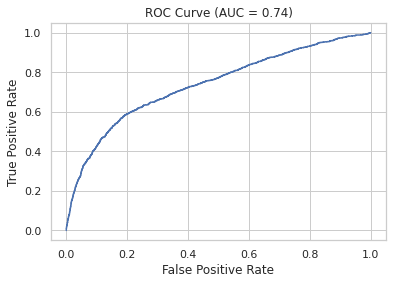

Optimal Threshold: 0.5126217334165185


In [267]:
from sklearn.metrics import roc_curve, roc_auc_score


# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test2, pred)
auc = roc_auc_score(y_test2, pred)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc))
plt.show()

# Find optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('Optimal Threshold:', optimal_threshold)


In [269]:
# Classify test data using optimal threshold
th_class = (pred > optimal_threshold).astype(int)
df_class = clf.predict(X_test1)
f1_score(y_test1, th_class), f1_score(y_test1, df_class)

(0.5104377104377104, 0.505702183121538)

In [ ]:
# function for logistic regression
def train_and_evaluate(model, X_train, y_train, X_test, y_test):

  # model fitting
  clf = model.fit(X_train, y_train)

  # predicting value and probability
  y_train_pred = clf.predict(X_train)
  y_test_pred = clf.predict(X_test)
  y_train_prob = clf.predict_proba(X_train)[:,1]
  y_test_prob = clf.predict_proba(X_test)[:,1]

  # # get the predicted probabilities
  # logistic_train_prob = clf.predict_proba(X_train)
  # logistic_test_prob = clf.predict_proba(X_test)

  # # get the predicted classes
  # logistic_train_class = clf.predict(X_train)
  # logistic_test_class = clf.predict(X_test)

  # calculating accuracy on train and test set
  train_acc = accuracy_score(y_train, y_train_pred)
  test_acc = accuracy_score(y_test, y_test_pred)

  print("\n")
  print("The accuracy on train data is:", train_acc)
  print("The accuracy on test data is:", test_acc)
  print("\n")

  # calculating precision and recall on the test set
  test_precision = precision_score(y_test, y_test_pred)
  print("The precision on test data is:", test_precision)

  test_recall = recall_score(y_test, y_test_pred)
  print("The recall on test data is:", test_recall)

  # calculating f1_score on the test set
  test_f1 = f1_score(y_test, y_test_pred)
  print("The F1 on test data is:", test_f1)

  # calculating roc_auc_score on the test set
  test_roc = roc_auc_score(y_test, y_test_prob)
  print("The roc auc score on test data is:", test_roc)

  # training confusion matrix
  print("\n")
  print("Confusion matrix for train set:")
  matrix(y_train, y_train_pred)
  plt.figure()
  plt.show()
  # testing confusion matrix
  print("\n")
  print("Confusion matrix for test set:")
  matrix(y_test, y_test_pred)
  plt.figure()
  plt.show()

  print("\n Classification report:")
  print(classification_report(y_test, y_test_pred))
  print("\n")

  # prediction in a dataframe
  pred = pd.DataFrame({'Actual Label': y_test,
                       'Predicted Label': y_test_pred})
  print("The top 5 rows of actual vs predicted labels\n", pred.head())

  return clf, test_acc, test_precision, test_recall, test_f1, test_roc

In [ ]:
# empty list for appending performance metric score 
model_result = []

def train_and_evaluate(model, model_name, X_train, y_train, X_test, y_test):
  
  '''
  Pass the model and predict value. 
  Function will calculate all the eveluation metrics and appending those metrics score on model_result table.
  Plotting confusion_matrix and roc_curve for test data.
  ''' 
  
  # model fitting
  clf = model.fit(X_train, y_train)
  
  # predicting value and probability
  y_train_pred = clf.predict(X_train)
  y_test_pred = clf.predict(X_test)
  y_train_prob = clf.predict_proba(X_train)[:,1]
  y_test_prob = clf.predict_proba(X_test)[:,1]


  ''' Performance Metrics ''' 
  # accuracy score  ---->  (TP+TN)/(TP+FP+TN+FN)
  train_accuracy = accuracy_score(y_train, y_train_pred) 
  test_accuracy = accuracy_score(y_test, y_test_pred)
  print(f'train accuracy : {round(train_accuracy,3)}')
  print(f'test accuracy : {round(test_accuracy,3)}')

  # precision score  ---->  TP/(TP+FP)
  train_precision = precision_score(y_train, y_train_pred)
  test_precision = precision_score(y_test, y_test_pred)
  print(f'train precision : {round(train_precision,3)}')
  print(f'test precision : {round(test_precision,3)}')

  # recall score  ---->  TP/(TP+FN)
  train_recall = recall_score(y_train, y_train_pred)
  test_recall = recall_score(y_test, y_test_pred)
  print(f'train recall : {round(train_recall,3)}')
  print(f'test recall : {round(test_recall,3)}')
  
  # f1 score  ---->  Harmonic Mean of Precision and Recall
  train_f1 = f1_score(y_train, y_train_pred)
  test_f1 = f1_score(y_test, y_test_pred)
  print(f'train f1 : {round(train_f1,3)}')
  print(f'test f1 : {round(test_f1,3)}')
  
  # roc_auc score  ---->  It shows how well the model can differentiate between classes.
  train_roc_auc = roc_auc_score(y_train, y_train_prob)
  test_roc_auc = roc_auc_score(y_test, y_test_prob)
  print(f'train roc_auc : {round(train_roc_auc,3)}')
  print(f'test roc_auc : {round(test_roc_auc,3)}')
  print('-'*80)

  # classification report
  print(f'classification report for test data \n{classification_report(y_test, y_test_pred)}')
  print('-'*80)


  ''' plotting Confusion Matrix '''
  ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
  plt.title('confusion matrix on Test data', weight='bold')
  plt.show()
  print('-'*80)


  ''' actual value vs predicted value on test data'''
  d = {'y_actual':y_test, 'y_predict':y_test_pred}
  print(pd.DataFrame(data=d).head(10).T)                   # constructing a dataframe with both actual and predicted values
  print('-'*80)

  '''Calculate threshold values for K-S chart'''

  # Compute the false positive rate, true positive rate, and thresholds for the ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

  # Calculate the maximum difference between the true positive rate and false positive rate
  ks_stat = tpr - fpr

  # Compute the threshold that maximizes the difference between the false positive rate and the true positive rate
  ks_threshold = thresholds[np.argmax(ks_stat)]

  # Plot the KS chart
  plt.plot(thresholds, tpr, label='True Positive Rate')
  plt.plot(thresholds, fpr, label='False Positive Rate')
  plt.plot(thresholds, ks_stat, label='KS Statistic')
  plt.axvline(ks_threshold, color='black', linestyle='--', label=f'KS Threshold: {ks_threshold:.2f}')
  plt.title('KS Chart')
  plt.xlabel('Threshold')
  plt.ylabel('Rate')
  plt.legend()
  plt.show()


  '''Using the score from the performance metrics to create the final model_result'''
  model_result.append({'model':model_name,
                       'train_accuracy':train_accuracy, 
                       'test_accuracy':test_accuracy, 
                       'train_precision':train_precision,
                       'test_precision':test_precision,
                       'train_recall':train_recall,
                       'test_recall':test_recall,
                       'train_f1':train_f1,
                       'test_f1':test_f1,
                       'train_roc_auc':train_roc_auc,
                       'test_roc_auc':test_roc_auc})

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***